## A brief Summary （4.11）

#### What I did and plan to do:
##### 1）Encountered issues with the hard constraint implementation. Reading the original FBPINN paper code line by line. --> Ongoing debugging and modularization (GPU support Already).--> Will then investigate whether feature-based subdomain decomposition outperforms uniform splitting on the selected example we discussed before.

##### 2）Better modify the two-phase training code and adapt it to JAX for acceleration.

##### 3）In POU approximation, what would happen if we only sample a few points? --> A demo shown below.

### Toy example

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import sys
import matplotlib.pyplot as plt

project_root = "/mnt/c/Users/chenwanxin/Documents/GitHub/thesis_project" 
sys.path.append(project_root)

from utils.pou_utils import toy_func_2, Normalizer, visualize_final_approximation
from model.rbf_pou import RBFPOUNet
from train.train_pou_rbf import train_two_phase_lsgd_rbf


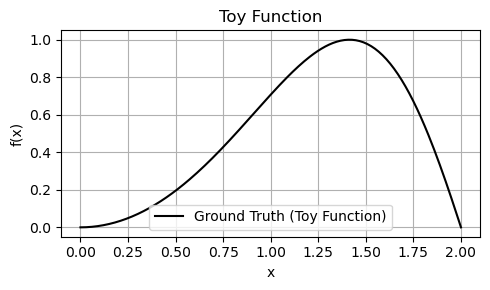

In [2]:
x_raw = np.linspace(0, 2, 200)  
y_true = np.array(toy_func_2(x_raw))  

# plot
plt.figure(figsize=(5, 3))
plt.plot(x_raw, y_true, label="Ground Truth (Toy Function)", color="black")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Toy Function")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
key = jax.random.PRNGKey(42)
num_partition = 2
model = RBFPOUNet(input_dim=1, num_centers=num_partition, key=key)
# Initialization
x_train_raw = jnp.linspace(0, 2, 100)  # original input
y_train = toy_func_2(x_train_raw)

normalizer = Normalizer(min_val=x_train_raw.min(), max_val=x_train_raw.max())
x_train = normalizer.transform(x_train_raw)  # normalized to  [0,1]

final_params = train_two_phase_lsgd_rbf(
    model,
    x_train,
    y_train,
    num_epochs_phase1=100,
    num_epochs_phase2=1000,
    lambda_reg=0.1,
    rho=0.99,
    n_stag=100,
    lr_phase1=0.05,
    lr_phase2=0.01
)

NameError: name 'low' is not defined

Debug: partitions_np.shape (20, 5)
Debug: N = 20, C = 5


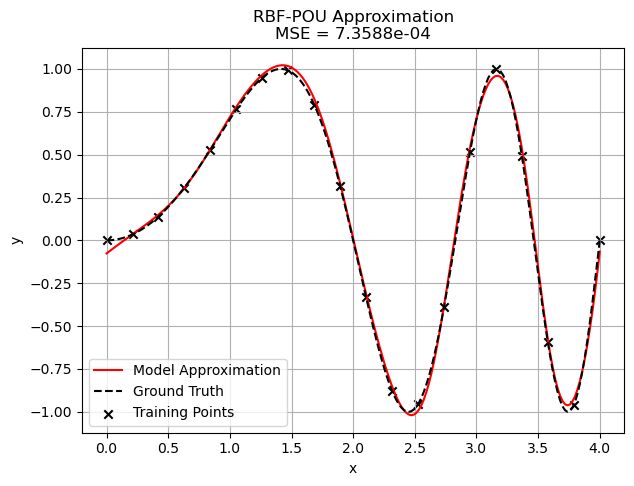

/mnt/c/Users/chenwanxin/Documents/GitHub/thesis_project/utils/pou_utils.py:187: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


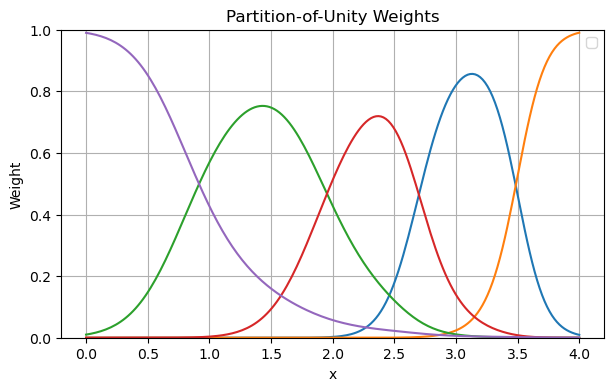

In [5]:
x_train = normalizer.transform(x_train_raw)

visualize_final_approximation(
    model=model,
    params=final_params,
    x_train=x_train,
    y_train=y_train,
    normalizer=normalizer,
    ground_truth_fn=toy_func_2,
    save_path=None,   
    show_partitions=True,
    title="RBF-POU Approximation"
)

# Larger domain

Debug: partitions_np.shape (60, 10)
Debug: N = 60, C = 10


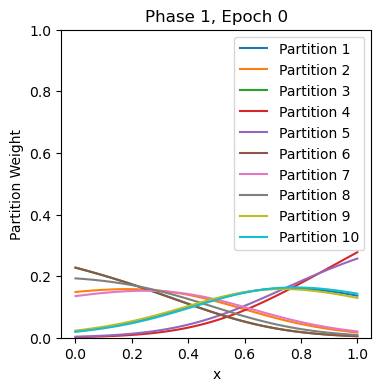

Phase 1, Epoch 0, Loss: 0.632302, λ: 0.200000
Phase 1, Epoch 10, Loss: 0.628099, λ: 0.200000
Phase 1, Epoch 20, Loss: 0.623263, λ: 0.200000
Phase 1, Epoch 30, Loss: 0.617587, λ: 0.200000
Phase 1, Epoch 40, Loss: 0.610886, λ: 0.200000
Phase 1, Epoch 50, Loss: 0.603039, λ: 0.200000
Phase 1, Epoch 60, Loss: 0.594021, λ: 0.200000
Phase 1, Epoch 70, Loss: 0.583925, λ: 0.200000
Phase 1, Epoch 80, Loss: 0.572938, λ: 0.200000
Phase 1, Epoch 90, Loss: 0.561278, λ: 0.200000
Phase 1, Epoch 100, Loss: 0.549322, λ: 0.200000
Phase 1, Epoch 110, Loss: 0.537752, λ: 0.200000
Phase 1, Epoch 120, Loss: 0.527176, λ: 0.200000
Phase 1, Epoch 130, Loss: 0.517531, λ: 0.200000
Phase 1, Epoch 140, Loss: 0.507572, λ: 0.200000


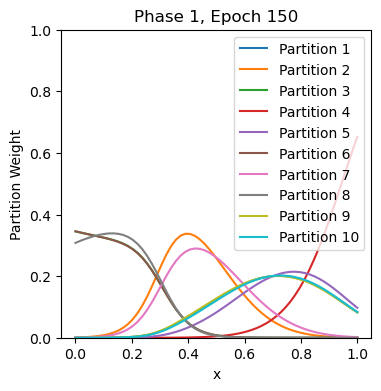

Phase 1, Epoch 150, Loss: 0.494156, λ: 0.200000
Phase 1, Epoch 160, Loss: 0.473008, λ: 0.200000
Phase 1, Epoch 170, Loss: 0.447503, λ: 0.200000
Phase 1, Epoch 180, Loss: 0.430713, λ: 0.200000
Phase 1, Epoch 190, Loss: 0.412480, λ: 0.200000
Phase 1, Epoch 200, Loss: 0.383825, λ: 0.200000
Phase 1, Epoch 210, Loss: 0.354415, λ: 0.200000
Phase 1, Epoch 220, Loss: 0.337162, λ: 0.200000
Phase 1, Epoch 230, Loss: 0.304107, λ: 0.200000
Phase 1, Epoch 240, Loss: 0.226483, λ: 0.200000
Phase 1, Epoch 250, Loss: 0.134766, λ: 0.200000
Phase 1, Epoch 260, Loss: 0.105744, λ: 0.200000
Phase 1, Epoch 270, Loss: 0.077115, λ: 0.200000
Phase 1, Epoch 280, Loss: 0.053248, λ: 0.200000
Phase 1, Epoch 290, Loss: 0.045518, λ: 0.200000


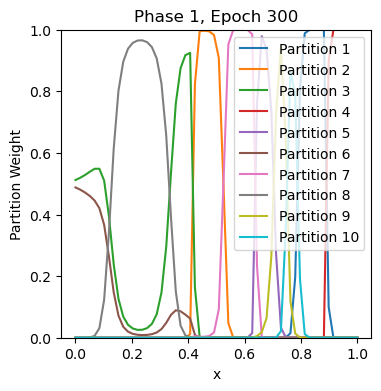

Phase 1, Epoch 300, Loss: 0.045421, λ: 0.200000
Phase 1, Epoch 310, Loss: 0.043319, λ: 0.200000
Phase 1, Epoch 320, Loss: 0.041534, λ: 0.200000
Phase 1, Epoch 330, Loss: 0.040387, λ: 0.200000
Phase 1, Epoch 340, Loss: 0.039570, λ: 0.200000
Phase 1, Epoch 350, Loss: 0.038456, λ: 0.200000
Phase 1, Epoch 360, Loss: 0.038081, λ: 0.200000
Phase 1, Epoch 370, Loss: 0.038070, λ: 0.200000
Phase 1, Epoch 380, Loss: 0.038075, λ: 0.200000
Phase 1, Epoch 390, Loss: 0.038038, λ: 0.200000
Phase 1, Epoch 400, Loss: 0.038082, λ: 0.200000
Phase 1, Epoch 410, Loss: 0.038134, λ: 0.200000
Phase 1, Epoch 420, Loss: 0.038002, λ: 0.200000
Phase 1, Epoch 430, Loss: 0.038010, λ: 0.200000
Phase 1, Epoch 440, Loss: 0.038030, λ: 0.200000


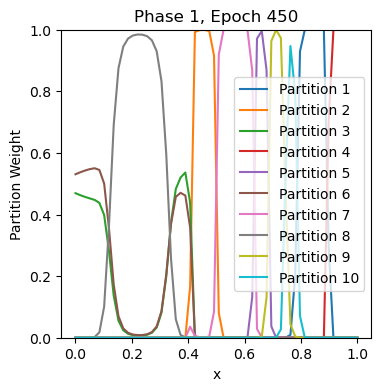

Phase 1, Epoch 450, Loss: 0.038028, λ: 0.200000
Phase 1, Epoch 460, Loss: 0.038155, λ: 0.200000
Phase 1, Epoch 470, Loss: 0.037990, λ: 0.200000
Phase 1, Epoch 480, Loss: 0.038106, λ: 0.200000
Phase 1, Epoch 490, Loss: 0.038003, λ: 0.200000
Phase 1, Epoch 500, Loss: 0.038058, λ: 0.200000
Phase 1, Epoch 510, Loss: 0.038721, λ: 0.200000
Phase 1, Epoch 520, Loss: 0.038197, λ: 0.200000
Phase 1, Epoch 530, Loss: 0.037983, λ: 0.200000
Phase 1, Epoch 540, Loss: 0.038058, λ: 0.200000
Phase 1, Epoch 550, Loss: 0.038124, λ: 0.200000
Phase 1, Epoch 560, Loss: 0.037966, λ: 0.200000
Phase 1, Epoch 570, Loss: 0.037966, λ: 0.200000
Phase 1, Epoch 580, Loss: 0.037959, λ: 0.200000
Phase 1, Epoch 590, Loss: 0.037966, λ: 0.200000


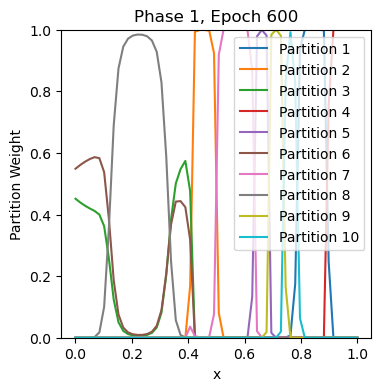

Phase 1, Epoch 600, Loss: 0.037943, λ: 0.200000
Phase 1, Epoch 610, Loss: 0.037916, λ: 0.200000
Phase 1, Epoch 620, Loss: 0.037977, λ: 0.200000
Phase 1, Epoch 630, Loss: 0.037903, λ: 0.200000
Phase 1, Epoch 640, Loss: 0.038133, λ: 0.200000
Phase 1, Epoch 650, Loss: 0.038358, λ: 0.200000
Phase 1, Epoch 660, Loss: 0.037904, λ: 0.200000
Phase 1, Epoch 670, Loss: 0.037962, λ: 0.200000
Phase 1, Epoch 680, Loss: 0.037841, λ: 0.200000
Phase 1, Epoch 690, Loss: 0.037924, λ: 0.200000
Phase 1, Epoch 700, Loss: 0.038151, λ: 0.200000
Phase 1, Epoch 710, Loss: 0.037967, λ: 0.200000
Phase 1, Epoch 720, Loss: 0.037761, λ: 0.200000
Phase 1, Epoch 730, Loss: 0.037798, λ: 0.200000
Phase 1, Epoch 740, Loss: 0.037727, λ: 0.200000


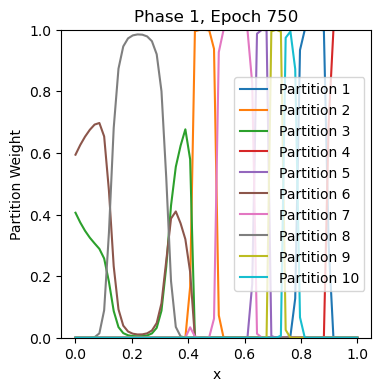

Phase 1, Epoch 750, Loss: 0.037722, λ: 0.200000
Phase 1, Epoch 760, Loss: 0.037613, λ: 0.200000
Phase 1, Epoch 770, Loss: 0.037734, λ: 0.200000
Phase 1, Epoch 780, Loss: 0.037520, λ: 0.200000
Phase 1, Epoch 790, Loss: 0.037384, λ: 0.200000
Phase 1, Epoch 800, Loss: 0.037303, λ: 0.200000
Phase 1, Epoch 810, Loss: 0.037121, λ: 0.200000
Phase 1, Epoch 820, Loss: 0.036906, λ: 0.200000
Phase 1, Epoch 830, Loss: 0.036790, λ: 0.200000
Phase 1, Epoch 840, Loss: 0.037041, λ: 0.200000
Phase 1, Epoch 850, Loss: 0.036787, λ: 0.200000
Phase 1, Epoch 860, Loss: 0.036578, λ: 0.200000
Phase 1, Epoch 870, Loss: 0.036532, λ: 0.200000
Phase 1, Epoch 880, Loss: 0.036769, λ: 0.200000
Phase 1, Epoch 890, Loss: 0.036497, λ: 0.200000


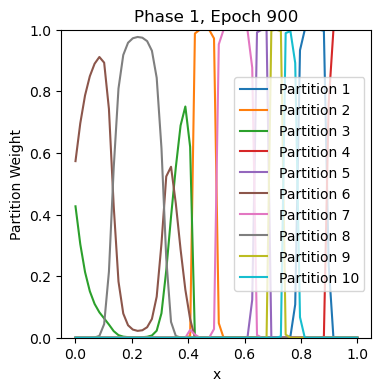

Phase 1, Epoch 900, Loss: 0.036447, λ: 0.200000
Phase 1, Epoch 910, Loss: 0.036437, λ: 0.200000
Phase 1, Epoch 920, Loss: 0.036414, λ: 0.200000
Phase 1, Epoch 930, Loss: 0.036443, λ: 0.200000
Phase 1, Epoch 940, Loss: 0.036380, λ: 0.200000
Phase 1, Epoch 950, Loss: 0.036301, λ: 0.200000
Phase 1, Epoch 960, Loss: 0.036406, λ: 0.200000
Phase 1, Epoch 970, Loss: 0.036238, λ: 0.200000
Phase 1, Epoch 980, Loss: 0.036187, λ: 0.200000
Phase 1, Epoch 990, Loss: 0.036598, λ: 0.200000
Phase 1, Epoch 1000, Loss: 0.036130, λ: 0.200000
Phase 1, Epoch 1010, Loss: 0.036107, λ: 0.200000
Phase 1, Epoch 1020, Loss: 0.036108, λ: 0.200000
Phase 1, Epoch 1030, Loss: 0.036005, λ: 0.200000
Phase 1, Epoch 1040, Loss: 0.035405, λ: 0.200000


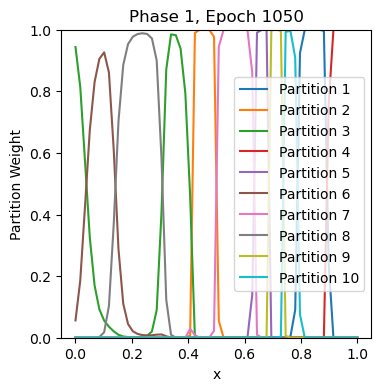

Phase 1, Epoch 1050, Loss: 0.035135, λ: 0.200000
Phase 1, Epoch 1060, Loss: 0.035891, λ: 0.200000
Phase 1, Epoch 1070, Loss: 0.035970, λ: 0.200000
Phase 1, Epoch 1080, Loss: 0.035791, λ: 0.200000
Phase 1, Epoch 1090, Loss: 0.035712, λ: 0.200000
Phase 1, Epoch 1100, Loss: 0.035639, λ: 0.200000
Phase 1, Epoch 1110, Loss: 0.035570, λ: 0.200000
Phase 1, Epoch 1120, Loss: 0.035484, λ: 0.200000
Phase 1, Epoch 1130, Loss: 0.035406, λ: 0.200000
Phase 1, Epoch 1140, Loss: 0.035391, λ: 0.200000
Phase 1, Epoch 1150, Loss: 0.035279, λ: 0.198000
Phase 1, Epoch 1160, Loss: 0.035227, λ: 0.198000
Phase 1, Epoch 1170, Loss: 0.035215, λ: 0.198000
Phase 1, Epoch 1180, Loss: 0.035141, λ: 0.198000
Phase 1, Epoch 1190, Loss: 0.035124, λ: 0.198000


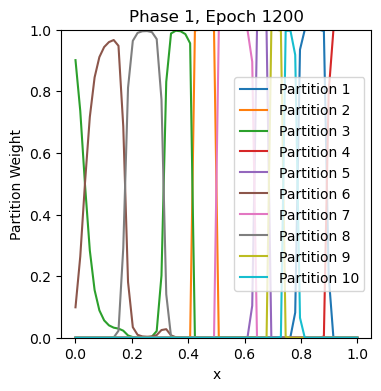

Phase 1, Epoch 1200, Loss: 0.035277, λ: 0.198000
Phase 1, Epoch 1210, Loss: 0.035082, λ: 0.198000
Phase 1, Epoch 1220, Loss: 0.035211, λ: 0.198000
Phase 1, Epoch 1230, Loss: 0.035178, λ: 0.198000
Phase 1, Epoch 1240, Loss: 0.035091, λ: 0.198000
Phase 1, Epoch 1250, Loss: 0.035008, λ: 0.196020
Phase 1, Epoch 1260, Loss: 0.035029, λ: 0.196020
Phase 1, Epoch 1270, Loss: 0.034986, λ: 0.196020
Phase 1, Epoch 1280, Loss: 0.034964, λ: 0.196020
Phase 1, Epoch 1290, Loss: 0.034993, λ: 0.196020
Phase 1, Epoch 1300, Loss: 0.034964, λ: 0.196020
Phase 1, Epoch 1310, Loss: 0.034905, λ: 0.196020
Phase 1, Epoch 1320, Loss: 0.034907, λ: 0.196020
Phase 1, Epoch 1330, Loss: 0.034893, λ: 0.196020
Phase 1, Epoch 1340, Loss: 0.034904, λ: 0.196020


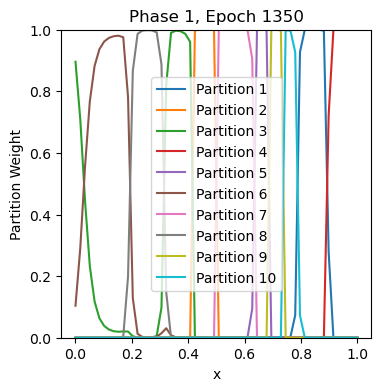

Phase 1, Epoch 1350, Loss: 0.034871, λ: 0.196020
Phase 1, Epoch 1360, Loss: 0.034867, λ: 0.196020
Phase 1, Epoch 1370, Loss: 0.034867, λ: 0.196020
Phase 1, Epoch 1380, Loss: 0.034990, λ: 0.196020
Phase 1, Epoch 1390, Loss: 0.034983, λ: 0.196020
Phase 1, Epoch 1400, Loss: 0.035029, λ: 0.196020
Phase 1, Epoch 1410, Loss: 0.034847, λ: 0.196020
Phase 1, Epoch 1420, Loss: 0.034849, λ: 0.196020
Phase 1, Epoch 1430, Loss: 0.035080, λ: 0.196020
Phase 1, Epoch 1440, Loss: 0.035088, λ: 0.196020
Phase 1, Epoch 1450, Loss: 0.034858, λ: 0.196020
Phase 1, Epoch 1460, Loss: 0.034852, λ: 0.196020
Phase 1, Epoch 1470, Loss: 0.034902, λ: 0.196020
Phase 1, Epoch 1480, Loss: 0.034837, λ: 0.196020
Phase 1, Epoch 1490, Loss: 0.034919, λ: 0.196020


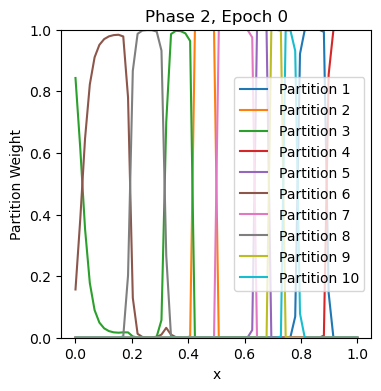

Phase 2, Epoch 0, Loss: 0.035193, λ: 0.000000
Phase 2, Epoch 10, Loss: 0.034352, λ: 0.000000
Phase 2, Epoch 20, Loss: 0.034333, λ: 0.000000
Phase 2, Epoch 30, Loss: 0.034344, λ: 0.000000
Phase 2, Epoch 40, Loss: 0.034332, λ: 0.000000


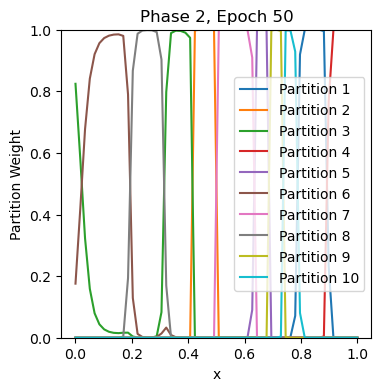

Phase 2, Epoch 50, Loss: 0.034358, λ: 0.000000
Phase 2, Epoch 60, Loss: 0.034401, λ: 0.000000
Phase 2, Epoch 70, Loss: 0.034331, λ: 0.000000
Phase 2, Epoch 80, Loss: 0.034297, λ: 0.000000
Phase 2, Epoch 90, Loss: 0.034296, λ: 0.000000


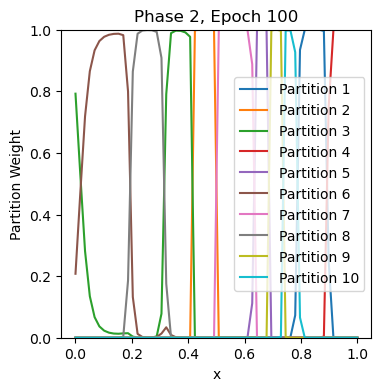

Phase 2, Epoch 100, Loss: 0.034282, λ: 0.000000
Phase 2, Epoch 110, Loss: 0.034267, λ: 0.000000
Phase 2, Epoch 120, Loss: 0.034270, λ: 0.000000
Phase 2, Epoch 130, Loss: 0.034275, λ: 0.000000
Phase 2, Epoch 140, Loss: 0.034251, λ: 0.000000


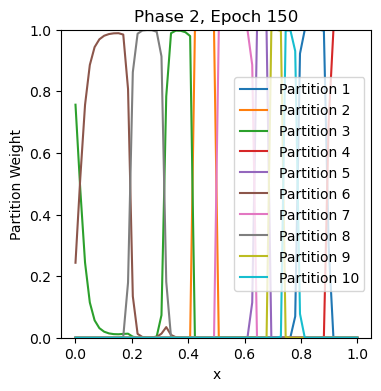

Phase 2, Epoch 150, Loss: 0.034285, λ: 0.000000
Phase 2, Epoch 160, Loss: 0.034240, λ: 0.000000
Phase 2, Epoch 170, Loss: 0.034353, λ: 0.000000
Phase 2, Epoch 180, Loss: 0.034430, λ: 0.000000
Phase 2, Epoch 190, Loss: 0.034288, λ: 0.000000


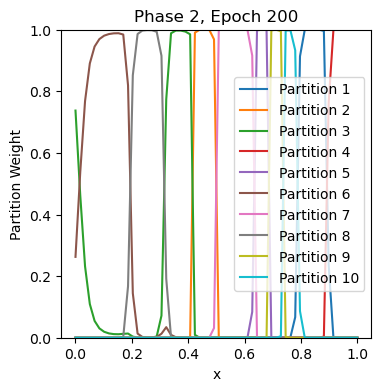

Phase 2, Epoch 200, Loss: 0.034306, λ: 0.000000
Phase 2, Epoch 210, Loss: 0.034302, λ: 0.000000
Phase 2, Epoch 220, Loss: 0.034254, λ: 0.000000
Phase 2, Epoch 230, Loss: 0.034263, λ: 0.000000
Phase 2, Epoch 240, Loss: 0.034245, λ: 0.000000


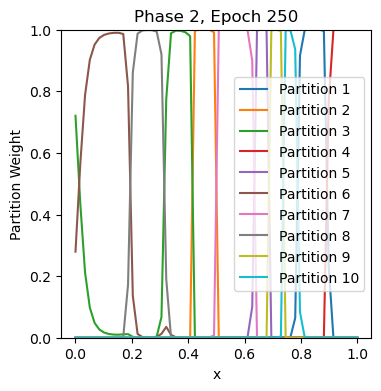

Phase 2, Epoch 250, Loss: 0.034284, λ: 0.000000
Phase 2, Epoch 260, Loss: 0.034239, λ: 0.000000
Phase 2, Epoch 270, Loss: 0.034235, λ: 0.000000
Phase 2, Epoch 280, Loss: 0.034275, λ: 0.000000
Phase 2, Epoch 290, Loss: 0.034332, λ: 0.000000


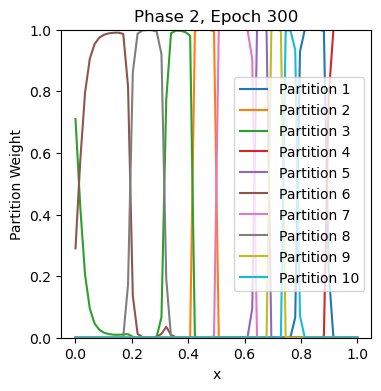

Phase 2, Epoch 300, Loss: 0.034341, λ: 0.000000
Phase 2, Epoch 310, Loss: 0.034287, λ: 0.000000
Phase 2, Epoch 320, Loss: 0.034227, λ: 0.000000
Phase 2, Epoch 330, Loss: 0.034651, λ: 0.000000
Phase 2, Epoch 340, Loss: 0.034308, λ: 0.000000


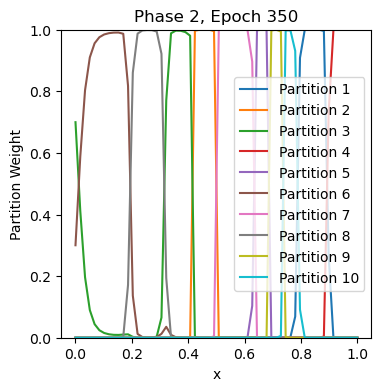

Phase 2, Epoch 350, Loss: 0.034228, λ: 0.000000
Phase 2, Epoch 360, Loss: 0.034227, λ: 0.000000
Phase 2, Epoch 370, Loss: 0.034241, λ: 0.000000
Phase 2, Epoch 380, Loss: 0.034238, λ: 0.000000
Phase 2, Epoch 390, Loss: 0.034222, λ: 0.000000


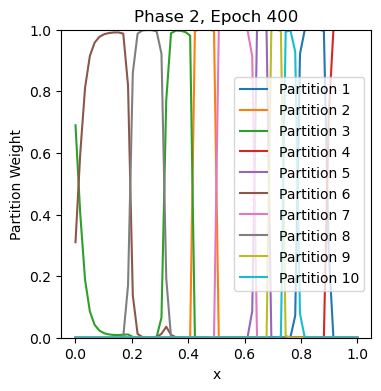

Phase 2, Epoch 400, Loss: 0.034229, λ: 0.000000
Phase 2, Epoch 410, Loss: 0.034276, λ: 0.000000
Phase 2, Epoch 420, Loss: 0.034439, λ: 0.000000
Phase 2, Epoch 430, Loss: 0.034342, λ: 0.000000
Phase 2, Epoch 440, Loss: 0.034223, λ: 0.000000


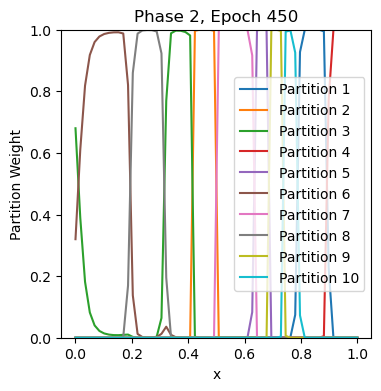

Phase 2, Epoch 450, Loss: 0.034287, λ: 0.000000
Phase 2, Epoch 460, Loss: 0.034260, λ: 0.000000
Phase 2, Epoch 470, Loss: 0.034231, λ: 0.000000
Phase 2, Epoch 480, Loss: 0.034242, λ: 0.000000
Phase 2, Epoch 490, Loss: 0.034219, λ: 0.000000


In [ ]:
key = jax.random.PRNGKey(42)
num_partition = 10
model = RBFPOUNet(input_dim=1, num_centers=num_partition, key=key)
# Initialization
x_train_raw = jnp.linspace(0, 6, 60)  # original input
y_train = toy_func_2(x_train_raw)

normalizer = Normalizer(min_val=x_train_raw.min(), max_val=x_train_raw.max())
x_train = normalizer.transform(x_train_raw)  # normalized to  [0,1]

final_params = train_two_phase_lsgd_rbf(
    model,
    x_train,
    y_train,
    num_epochs_phase1=1500,
    num_epochs_phase2=500,
    lambda_reg=0.2,
    rho=0.99,
    n_stag=100,
    lr_phase1=0.001,
    lr_phase2=0.0005
)

Debug: partitions_np.shape (60, 10)
Debug: N = 60, C = 10


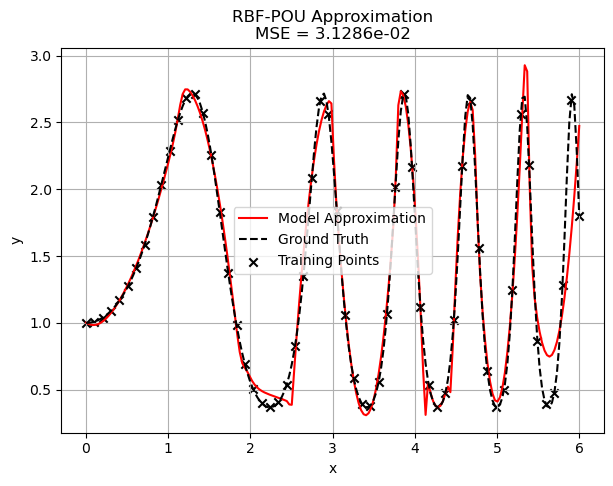

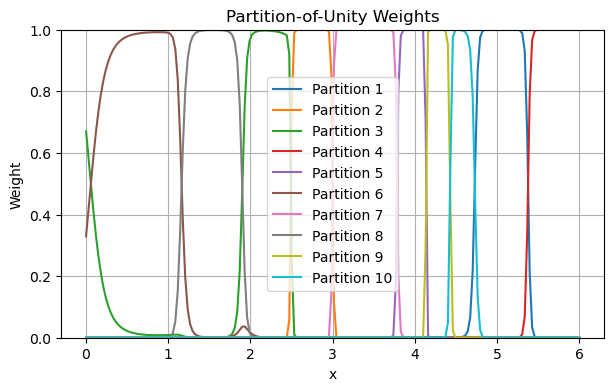

In [37]:
x_train = normalizer.transform(x_train_raw)

visualize_final_approximation(
    model=model,
    params=final_params,
    x_train=x_train,
    y_train=y_train,
    normalizer=normalizer,
    ground_truth_fn=toy_func,
    save_path=None,   
    show_partitions=True,
    title="RBF-POU Approximation"
)

### Number of partitions = 12

Debug: partitions_np.shape (60, 12)
Debug: N = 60, C = 12


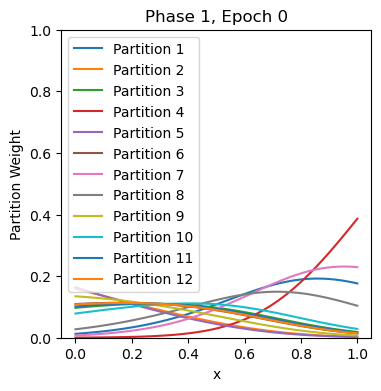

Phase 1, Epoch 0, Loss: 0.634093, λ: 0.200000
Phase 1, Epoch 10, Loss: 0.629604, λ: 0.200000
Phase 1, Epoch 20, Loss: 0.624395, λ: 0.200000
Phase 1, Epoch 30, Loss: 0.618285, λ: 0.200000
Phase 1, Epoch 40, Loss: 0.611162, λ: 0.200000
Phase 1, Epoch 50, Loss: 0.603052, λ: 0.200000
Phase 1, Epoch 60, Loss: 0.594179, λ: 0.200000
Phase 1, Epoch 70, Loss: 0.584951, λ: 0.200000
Phase 1, Epoch 80, Loss: 0.575841, λ: 0.200000
Phase 1, Epoch 90, Loss: 0.567110, λ: 0.200000


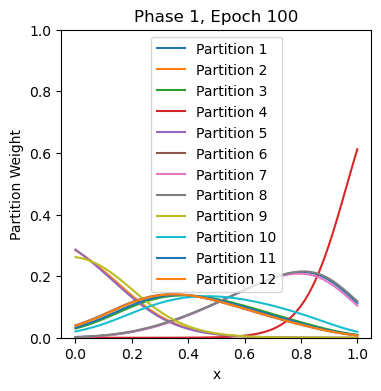

Phase 1, Epoch 100, Loss: 0.558593, λ: 0.200000
Phase 1, Epoch 110, Loss: 0.549922, λ: 0.200000
Phase 1, Epoch 120, Loss: 0.541072, λ: 0.200000
Phase 1, Epoch 130, Loss: 0.532441, λ: 0.200000
Phase 1, Epoch 140, Loss: 0.523982, λ: 0.200000
Phase 1, Epoch 150, Loss: 0.514384, λ: 0.200000
Phase 1, Epoch 160, Loss: 0.500761, λ: 0.200000
Phase 1, Epoch 170, Loss: 0.476343, λ: 0.200000
Phase 1, Epoch 180, Loss: 0.437314, λ: 0.200000
Phase 1, Epoch 190, Loss: 0.393724, λ: 0.200000


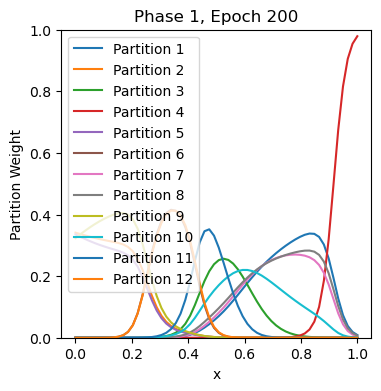

Phase 1, Epoch 200, Loss: 0.349512, λ: 0.200000
Phase 1, Epoch 210, Loss: 0.285906, λ: 0.200000
Phase 1, Epoch 220, Loss: 0.228739, λ: 0.200000
Phase 1, Epoch 230, Loss: 0.165049, λ: 0.200000
Phase 1, Epoch 240, Loss: 0.082089, λ: 0.200000
Phase 1, Epoch 250, Loss: 0.060884, λ: 0.200000
Phase 1, Epoch 260, Loss: 0.046391, λ: 0.200000
Phase 1, Epoch 270, Loss: 0.040543, λ: 0.200000
Phase 1, Epoch 280, Loss: 0.039835, λ: 0.200000
Phase 1, Epoch 290, Loss: 0.038120, λ: 0.200000


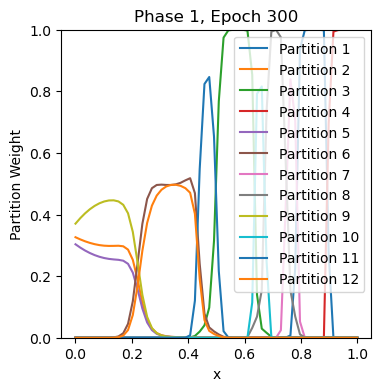

Phase 1, Epoch 300, Loss: 0.037333, λ: 0.200000
Phase 1, Epoch 310, Loss: 0.036329, λ: 0.200000
Phase 1, Epoch 320, Loss: 0.035844, λ: 0.200000
Phase 1, Epoch 330, Loss: 0.034619, λ: 0.200000
Phase 1, Epoch 340, Loss: 0.034207, λ: 0.200000
Phase 1, Epoch 350, Loss: 0.034288, λ: 0.200000
Phase 1, Epoch 360, Loss: 0.034402, λ: 0.200000
Phase 1, Epoch 370, Loss: 0.035197, λ: 0.200000
Phase 1, Epoch 380, Loss: 0.034043, λ: 0.200000
Phase 1, Epoch 390, Loss: 0.034330, λ: 0.200000


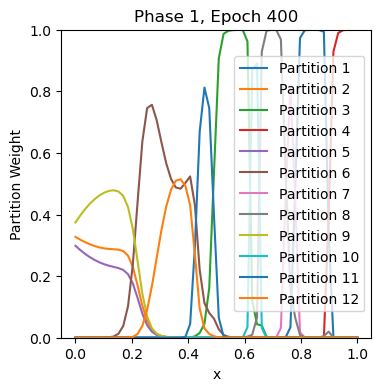

Phase 1, Epoch 400, Loss: 0.033246, λ: 0.200000
Phase 1, Epoch 410, Loss: 0.033118, λ: 0.200000
Phase 1, Epoch 420, Loss: 0.034154, λ: 0.200000
Phase 1, Epoch 430, Loss: 0.033359, λ: 0.200000
Phase 1, Epoch 440, Loss: 0.033219, λ: 0.200000
Phase 1, Epoch 450, Loss: 0.032562, λ: 0.200000
Phase 1, Epoch 460, Loss: 0.032115, λ: 0.200000
Phase 1, Epoch 470, Loss: 0.033091, λ: 0.200000
Phase 1, Epoch 480, Loss: 0.033269, λ: 0.200000
Phase 1, Epoch 490, Loss: 0.032515, λ: 0.200000


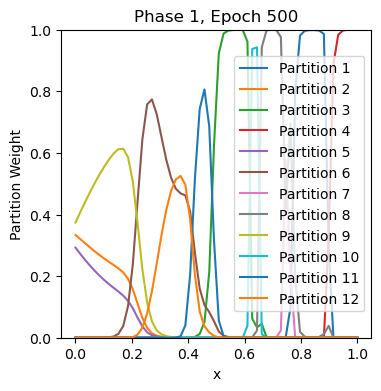

Phase 1, Epoch 500, Loss: 0.032242, λ: 0.200000
Phase 1, Epoch 510, Loss: 0.031796, λ: 0.200000
Phase 1, Epoch 520, Loss: 0.031742, λ: 0.200000
Phase 1, Epoch 530, Loss: 0.031656, λ: 0.200000
Phase 1, Epoch 540, Loss: 0.031622, λ: 0.200000
Phase 1, Epoch 550, Loss: 0.031779, λ: 0.200000
Phase 1, Epoch 560, Loss: 0.031711, λ: 0.200000
Phase 1, Epoch 570, Loss: 0.031502, λ: 0.200000
Phase 1, Epoch 580, Loss: 0.031508, λ: 0.200000
Phase 1, Epoch 590, Loss: 0.031381, λ: 0.200000


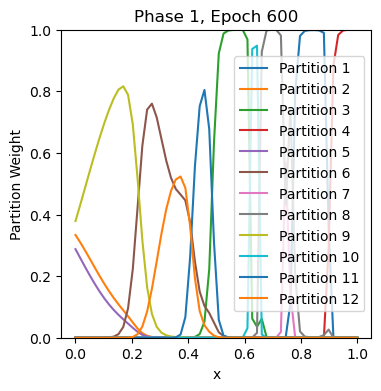

Phase 1, Epoch 600, Loss: 0.031430, λ: 0.200000
Phase 1, Epoch 610, Loss: 0.031379, λ: 0.200000
Phase 1, Epoch 620, Loss: 0.031323, λ: 0.200000
Phase 1, Epoch 630, Loss: 0.031344, λ: 0.200000
Phase 1, Epoch 640, Loss: 0.031297, λ: 0.200000
Phase 1, Epoch 650, Loss: 0.031227, λ: 0.200000
Phase 1, Epoch 660, Loss: 0.031202, λ: 0.200000
Phase 1, Epoch 670, Loss: 0.031208, λ: 0.200000
Phase 1, Epoch 680, Loss: 0.031179, λ: 0.200000
Phase 1, Epoch 690, Loss: 0.031163, λ: 0.200000


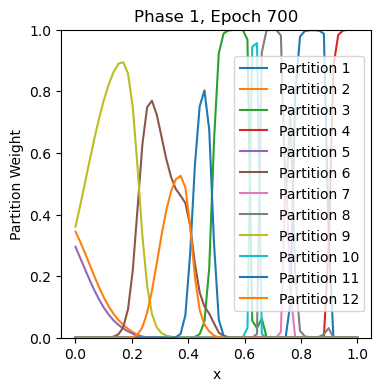

Phase 1, Epoch 700, Loss: 0.031090, λ: 0.200000
Phase 1, Epoch 710, Loss: 0.031130, λ: 0.200000
Phase 1, Epoch 720, Loss: 0.031222, λ: 0.200000
Phase 1, Epoch 730, Loss: 0.031173, λ: 0.200000
Phase 1, Epoch 740, Loss: 0.031061, λ: 0.200000
Phase 1, Epoch 750, Loss: 0.031049, λ: 0.200000
Phase 1, Epoch 760, Loss: 0.031073, λ: 0.200000
Phase 1, Epoch 770, Loss: 0.031051, λ: 0.200000
Phase 1, Epoch 780, Loss: 0.030973, λ: 0.200000
Phase 1, Epoch 790, Loss: 0.031034, λ: 0.200000


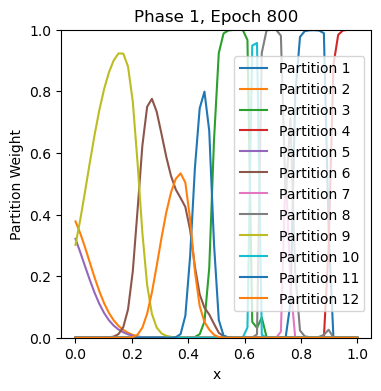

Phase 1, Epoch 800, Loss: 0.030999, λ: 0.200000
Phase 1, Epoch 810, Loss: 0.030953, λ: 0.200000
Phase 1, Epoch 820, Loss: 0.031411, λ: 0.200000
Phase 1, Epoch 830, Loss: 0.030861, λ: 0.200000
Phase 1, Epoch 840, Loss: 0.030901, λ: 0.200000
Phase 1, Epoch 850, Loss: 0.030824, λ: 0.200000
Phase 1, Epoch 860, Loss: 0.030752, λ: 0.200000
Phase 1, Epoch 870, Loss: 0.030984, λ: 0.200000
Phase 1, Epoch 880, Loss: 0.030941, λ: 0.200000
Phase 1, Epoch 890, Loss: 0.030682, λ: 0.200000


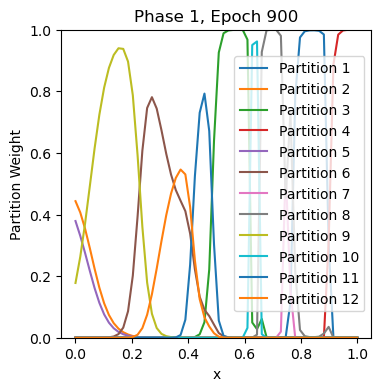

Phase 1, Epoch 900, Loss: 0.030765, λ: 0.200000
Phase 1, Epoch 910, Loss: 0.030663, λ: 0.200000
Phase 1, Epoch 920, Loss: 0.030668, λ: 0.200000
Phase 1, Epoch 930, Loss: 0.030632, λ: 0.200000
Phase 1, Epoch 940, Loss: 0.030435, λ: 0.200000
Phase 1, Epoch 950, Loss: 0.030385, λ: 0.200000
Phase 1, Epoch 960, Loss: 0.030284, λ: 0.200000
Phase 1, Epoch 970, Loss: 0.030335, λ: 0.200000
Phase 1, Epoch 980, Loss: 0.030127, λ: 0.200000
Phase 1, Epoch 990, Loss: 0.030067, λ: 0.200000


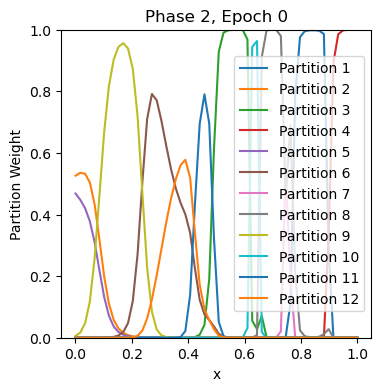

Phase 2, Epoch 0, Loss: 0.029554, λ: 0.000000
Phase 2, Epoch 10, Loss: 0.029081, λ: 0.000000
Phase 2, Epoch 20, Loss: 0.029058, λ: 0.000000
Phase 2, Epoch 30, Loss: 0.029032, λ: 0.000000
Phase 2, Epoch 40, Loss: 0.028984, λ: 0.000000


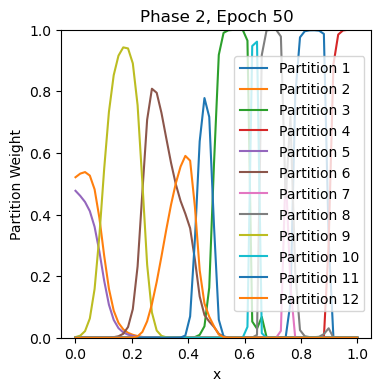

Phase 2, Epoch 50, Loss: 0.028985, λ: 0.000000
Phase 2, Epoch 60, Loss: 0.028910, λ: 0.000000
Phase 2, Epoch 70, Loss: 0.028901, λ: 0.000000
Phase 2, Epoch 80, Loss: 0.028847, λ: 0.000000
Phase 2, Epoch 90, Loss: 0.028805, λ: 0.000000


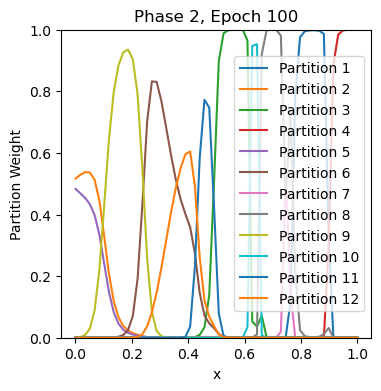

Phase 2, Epoch 100, Loss: 0.028796, λ: 0.000000
Phase 2, Epoch 110, Loss: 0.028763, λ: 0.000000
Phase 2, Epoch 120, Loss: 0.028732, λ: 0.000000
Phase 2, Epoch 130, Loss: 0.028681, λ: 0.000000
Phase 2, Epoch 140, Loss: 0.028649, λ: 0.000000


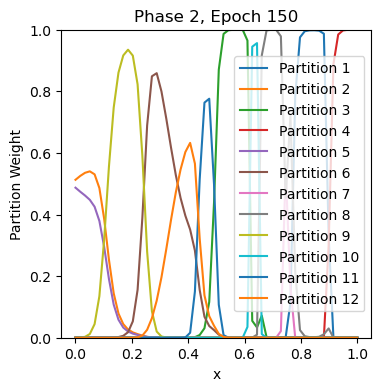

Phase 2, Epoch 150, Loss: 0.028635, λ: 0.000000
Phase 2, Epoch 160, Loss: 0.028583, λ: 0.000000
Phase 2, Epoch 170, Loss: 0.028529, λ: 0.000000
Phase 2, Epoch 180, Loss: 0.028571, λ: 0.000000
Phase 2, Epoch 190, Loss: 0.028485, λ: 0.000000


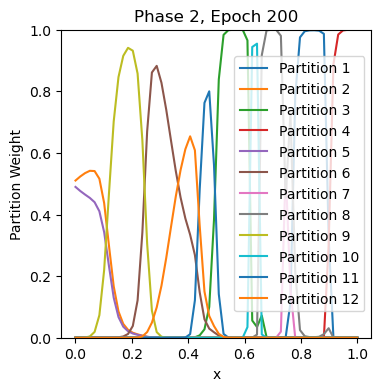

Phase 2, Epoch 200, Loss: 0.028488, λ: 0.000000
Phase 2, Epoch 210, Loss: 0.028477, λ: 0.000000
Phase 2, Epoch 220, Loss: 0.028440, λ: 0.000000
Phase 2, Epoch 230, Loss: 0.028412, λ: 0.000000
Phase 2, Epoch 240, Loss: 0.028368, λ: 0.000000


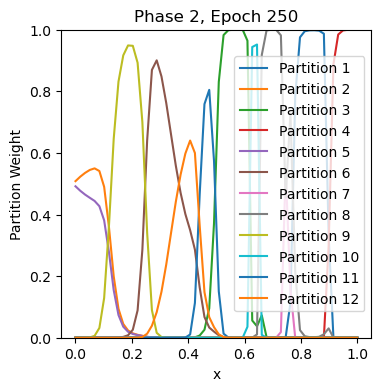

Phase 2, Epoch 250, Loss: 0.028329, λ: 0.000000
Phase 2, Epoch 260, Loss: 0.028331, λ: 0.000000
Phase 2, Epoch 270, Loss: 0.028288, λ: 0.000000
Phase 2, Epoch 280, Loss: 0.028296, λ: 0.000000
Phase 2, Epoch 290, Loss: 0.028247, λ: 0.000000


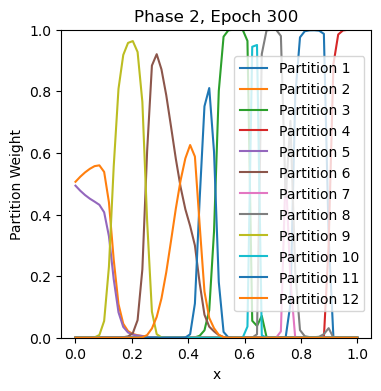

Phase 2, Epoch 300, Loss: 0.028223, λ: 0.000000
Phase 2, Epoch 310, Loss: 0.028205, λ: 0.000000
Phase 2, Epoch 320, Loss: 0.028153, λ: 0.000000
Phase 2, Epoch 330, Loss: 0.028136, λ: 0.000000
Phase 2, Epoch 340, Loss: 0.028110, λ: 0.000000


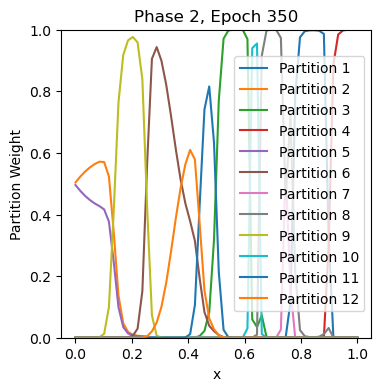

Phase 2, Epoch 350, Loss: 0.028064, λ: 0.000000
Phase 2, Epoch 360, Loss: 0.028058, λ: 0.000000
Phase 2, Epoch 370, Loss: 0.028032, λ: 0.000000
Phase 2, Epoch 380, Loss: 0.027993, λ: 0.000000
Phase 2, Epoch 390, Loss: 0.027979, λ: 0.000000


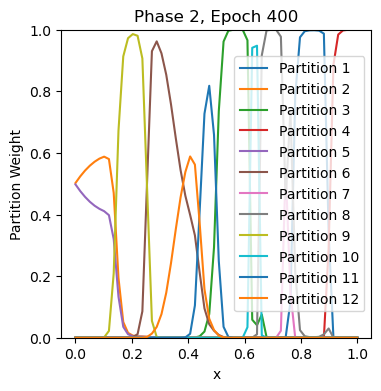

Phase 2, Epoch 400, Loss: 0.027959, λ: 0.000000
Phase 2, Epoch 410, Loss: 0.027963, λ: 0.000000
Phase 2, Epoch 420, Loss: 0.027920, λ: 0.000000
Phase 2, Epoch 430, Loss: 0.027870, λ: 0.000000
Phase 2, Epoch 440, Loss: 0.027815, λ: 0.000000


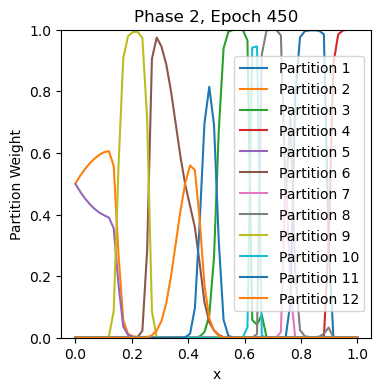

Phase 2, Epoch 450, Loss: 0.027842, λ: 0.000000
Phase 2, Epoch 460, Loss: 0.027750, λ: 0.000000
Phase 2, Epoch 470, Loss: 0.027732, λ: 0.000000
Phase 2, Epoch 480, Loss: 0.027768, λ: 0.000000
Phase 2, Epoch 490, Loss: 0.027694, λ: 0.000000


In [45]:
key = jax.random.PRNGKey(42)
num_partition = 12
model = RBFPOUNet(input_dim=1, num_centers=num_partition, key=key)
# Initialization
x_train_raw = jnp.linspace(0, 6, 60)  # original input
y_train = toy_func(x_train_raw)

normalizer = Normalizer(min_val=x_train_raw.min(), max_val=x_train_raw.max())
x_train = normalizer.transform(x_train_raw)  # normalized to  [0,1]

final_params = train_two_phase_lsgd_rbf(
    model,
    x_train,
    y_train,
    num_epochs_phase1=1000,
    num_epochs_phase2=500,
    lambda_reg=0.2,
    rho=0.99,
    n_stag=100,
    lr_phase1=0.001,
    lr_phase2=0.0001
)

Debug: partitions_np.shape (60, 12)
Debug: N = 60, C = 12


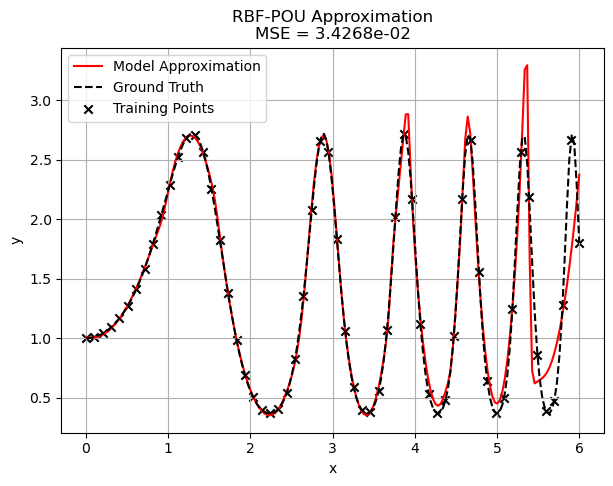

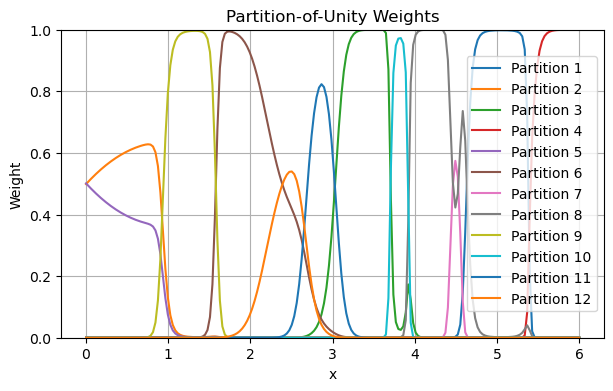

In [46]:
x_train = normalizer.transform(x_train_raw)

visualize_final_approximation(
    model=model,
    params=final_params,
    x_train=x_train,
    y_train=y_train,
    normalizer=normalizer,
    ground_truth_fn=toy_func,
    save_path=None,   
    show_partitions=True,
    title="RBF-POU Approximation"
)

# Not uniform Sampling 
#### (More training points where frequency is high)

Debug: partitions_np.shape (60, 12)
Debug: N = 60, C = 12


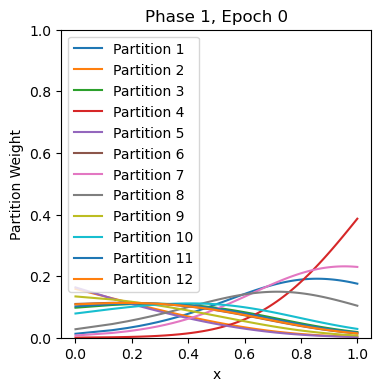

Phase 1, Epoch 0, Loss: 0.714253, λ: 0.200000
Phase 1, Epoch 10, Loss: 0.713422, λ: 0.200000
Phase 1, Epoch 20, Loss: 0.712602, λ: 0.200000
Phase 1, Epoch 30, Loss: 0.711793, λ: 0.200000
Phase 1, Epoch 40, Loss: 0.710994, λ: 0.200000
Phase 1, Epoch 50, Loss: 0.710206, λ: 0.200000
Phase 1, Epoch 60, Loss: 0.709426, λ: 0.200000
Phase 1, Epoch 70, Loss: 0.708656, λ: 0.200000
Phase 1, Epoch 80, Loss: 0.707892, λ: 0.200000
Phase 1, Epoch 90, Loss: 0.707136, λ: 0.200000
Phase 1, Epoch 100, Loss: 0.706386, λ: 0.200000
Phase 1, Epoch 110, Loss: 0.705643, λ: 0.200000
Phase 1, Epoch 120, Loss: 0.704906, λ: 0.200000
Phase 1, Epoch 130, Loss: 0.704176, λ: 0.200000
Phase 1, Epoch 140, Loss: 0.703454, λ: 0.200000


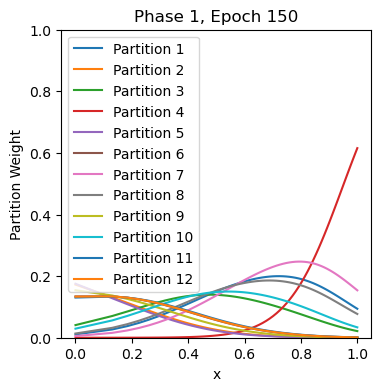

Phase 1, Epoch 150, Loss: 0.702742, λ: 0.200000
Phase 1, Epoch 160, Loss: 0.702041, λ: 0.200000
Phase 1, Epoch 170, Loss: 0.701352, λ: 0.200000
Phase 1, Epoch 180, Loss: 0.700677, λ: 0.200000
Phase 1, Epoch 190, Loss: 0.700018, λ: 0.200000
Phase 1, Epoch 200, Loss: 0.699375, λ: 0.200000
Phase 1, Epoch 210, Loss: 0.698750, λ: 0.200000
Phase 1, Epoch 220, Loss: 0.698141, λ: 0.200000
Phase 1, Epoch 230, Loss: 0.697549, λ: 0.200000
Phase 1, Epoch 240, Loss: 0.696970, λ: 0.200000
Phase 1, Epoch 250, Loss: 0.696404, λ: 0.200000
Phase 1, Epoch 260, Loss: 0.695847, λ: 0.200000
Phase 1, Epoch 270, Loss: 0.695295, λ: 0.200000
Phase 1, Epoch 280, Loss: 0.694746, λ: 0.200000
Phase 1, Epoch 290, Loss: 0.694196, λ: 0.200000


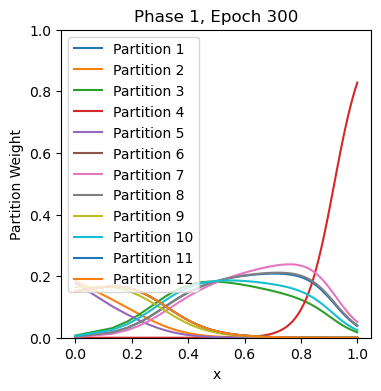

Phase 1, Epoch 300, Loss: 0.693647, λ: 0.200000
Phase 1, Epoch 310, Loss: 0.693099, λ: 0.200000
Phase 1, Epoch 320, Loss: 0.692556, λ: 0.200000
Phase 1, Epoch 330, Loss: 0.692021, λ: 0.200000
Phase 1, Epoch 340, Loss: 0.691495, λ: 0.200000
Phase 1, Epoch 350, Loss: 0.690975, λ: 0.200000
Phase 1, Epoch 360, Loss: 0.690453, λ: 0.200000
Phase 1, Epoch 370, Loss: 0.689920, λ: 0.200000
Phase 1, Epoch 380, Loss: 0.689363, λ: 0.200000
Phase 1, Epoch 390, Loss: 0.688786, λ: 0.200000
Phase 1, Epoch 400, Loss: 0.688192, λ: 0.200000
Phase 1, Epoch 410, Loss: 0.687589, λ: 0.200000
Phase 1, Epoch 420, Loss: 0.686982, λ: 0.200000
Phase 1, Epoch 430, Loss: 0.686374, λ: 0.200000
Phase 1, Epoch 440, Loss: 0.685761, λ: 0.200000


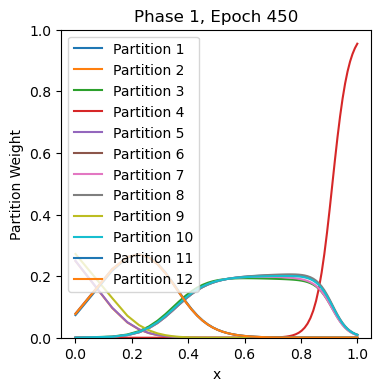

Phase 1, Epoch 450, Loss: 0.685141, λ: 0.200000
Phase 1, Epoch 460, Loss: 0.684511, λ: 0.200000
Phase 1, Epoch 470, Loss: 0.683862, λ: 0.200000
Phase 1, Epoch 480, Loss: 0.683187, λ: 0.200000
Phase 1, Epoch 490, Loss: 0.682477, λ: 0.200000
Phase 1, Epoch 500, Loss: 0.681734, λ: 0.200000
Phase 1, Epoch 510, Loss: 0.680976, λ: 0.200000
Phase 1, Epoch 520, Loss: 0.680230, λ: 0.200000
Phase 1, Epoch 530, Loss: 0.679519, λ: 0.200000
Phase 1, Epoch 540, Loss: 0.678850, λ: 0.200000
Phase 1, Epoch 550, Loss: 0.678197, λ: 0.200000
Phase 1, Epoch 560, Loss: 0.677526, λ: 0.200000
Phase 1, Epoch 570, Loss: 0.676836, λ: 0.200000
Phase 1, Epoch 580, Loss: 0.676117, λ: 0.200000
Phase 1, Epoch 590, Loss: 0.675207, λ: 0.200000


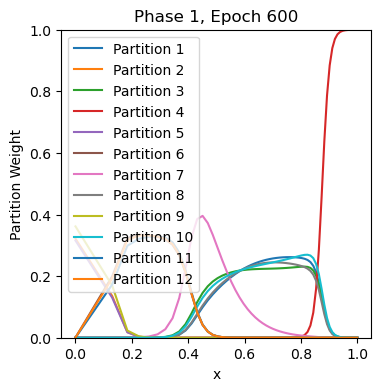

Phase 1, Epoch 600, Loss: 0.674073, λ: 0.200000
Phase 1, Epoch 610, Loss: 0.672715, λ: 0.200000
Phase 1, Epoch 620, Loss: 0.671104, λ: 0.200000
Phase 1, Epoch 630, Loss: 0.669223, λ: 0.200000
Phase 1, Epoch 640, Loss: 0.666646, λ: 0.200000
Phase 1, Epoch 650, Loss: 0.662158, λ: 0.200000
Phase 1, Epoch 660, Loss: 0.649782, λ: 0.200000
Phase 1, Epoch 670, Loss: 0.642444, λ: 0.200000
Phase 1, Epoch 680, Loss: 0.632210, λ: 0.200000
Phase 1, Epoch 690, Loss: 0.626167, λ: 0.200000
Phase 1, Epoch 700, Loss: 0.594847, λ: 0.200000
Phase 1, Epoch 710, Loss: 0.548276, λ: 0.200000
Phase 1, Epoch 720, Loss: 0.464438, λ: 0.200000
Phase 1, Epoch 730, Loss: nan, λ: 0.200000
Phase 1, Epoch 740, Loss: nan, λ: 0.200000


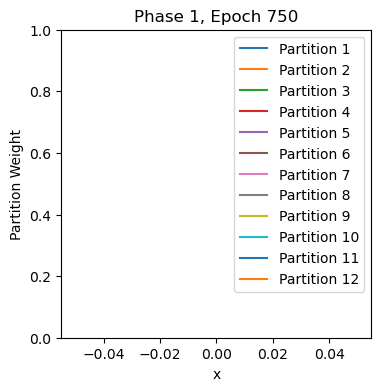

Phase 1, Epoch 750, Loss: nan, λ: 0.200000
Phase 1, Epoch 760, Loss: nan, λ: 0.200000
Phase 1, Epoch 770, Loss: nan, λ: 0.200000
Phase 1, Epoch 780, Loss: nan, λ: 0.200000
Phase 1, Epoch 790, Loss: nan, λ: 0.200000
Phase 1, Epoch 800, Loss: nan, λ: 0.200000
Phase 1, Epoch 810, Loss: nan, λ: 0.200000
Phase 1, Epoch 820, Loss: nan, λ: 0.200000
Phase 1, Epoch 830, Loss: nan, λ: 0.198000
Phase 1, Epoch 840, Loss: nan, λ: 0.198000
Phase 1, Epoch 850, Loss: nan, λ: 0.198000
Phase 1, Epoch 860, Loss: nan, λ: 0.198000
Phase 1, Epoch 870, Loss: nan, λ: 0.198000
Phase 1, Epoch 880, Loss: nan, λ: 0.198000
Phase 1, Epoch 890, Loss: nan, λ: 0.198000


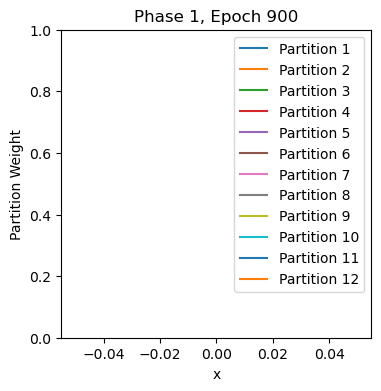

Phase 1, Epoch 900, Loss: nan, λ: 0.198000
Phase 1, Epoch 910, Loss: nan, λ: 0.198000
Phase 1, Epoch 920, Loss: nan, λ: 0.198000
Phase 1, Epoch 930, Loss: nan, λ: 0.196020
Phase 1, Epoch 940, Loss: nan, λ: 0.196020
Phase 1, Epoch 950, Loss: nan, λ: 0.196020
Phase 1, Epoch 960, Loss: nan, λ: 0.196020
Phase 1, Epoch 970, Loss: nan, λ: 0.196020
Phase 1, Epoch 980, Loss: nan, λ: 0.196020
Phase 1, Epoch 990, Loss: nan, λ: 0.196020
Phase 1, Epoch 1000, Loss: nan, λ: 0.196020
Phase 1, Epoch 1010, Loss: nan, λ: 0.196020
Phase 1, Epoch 1020, Loss: nan, λ: 0.196020
Phase 1, Epoch 1030, Loss: nan, λ: 0.194060
Phase 1, Epoch 1040, Loss: nan, λ: 0.194060


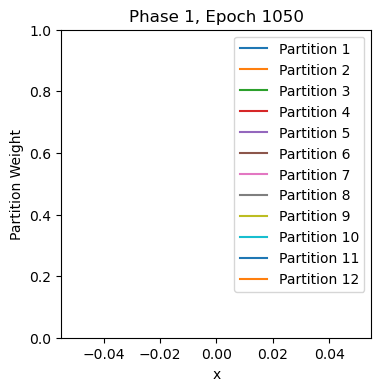

Phase 1, Epoch 1050, Loss: nan, λ: 0.194060
Phase 1, Epoch 1060, Loss: nan, λ: 0.194060
Phase 1, Epoch 1070, Loss: nan, λ: 0.194060
Phase 1, Epoch 1080, Loss: nan, λ: 0.194060
Phase 1, Epoch 1090, Loss: nan, λ: 0.194060
Phase 1, Epoch 1100, Loss: nan, λ: 0.194060
Phase 1, Epoch 1110, Loss: nan, λ: 0.194060
Phase 1, Epoch 1120, Loss: nan, λ: 0.194060
Phase 1, Epoch 1130, Loss: nan, λ: 0.192119
Phase 1, Epoch 1140, Loss: nan, λ: 0.192119
Phase 1, Epoch 1150, Loss: nan, λ: 0.192119
Phase 1, Epoch 1160, Loss: nan, λ: 0.192119
Phase 1, Epoch 1170, Loss: nan, λ: 0.192119
Phase 1, Epoch 1180, Loss: nan, λ: 0.192119
Phase 1, Epoch 1190, Loss: nan, λ: 0.192119


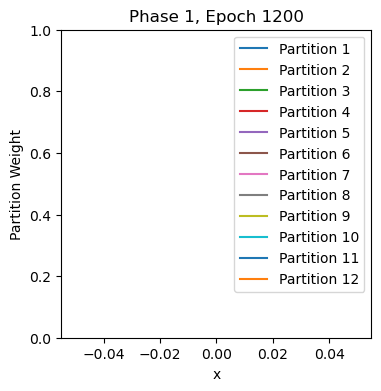

Phase 1, Epoch 1200, Loss: nan, λ: 0.192119
Phase 1, Epoch 1210, Loss: nan, λ: 0.192119
Phase 1, Epoch 1220, Loss: nan, λ: 0.192119
Phase 1, Epoch 1230, Loss: nan, λ: 0.190198
Phase 1, Epoch 1240, Loss: nan, λ: 0.190198
Phase 1, Epoch 1250, Loss: nan, λ: 0.190198
Phase 1, Epoch 1260, Loss: nan, λ: 0.190198
Phase 1, Epoch 1270, Loss: nan, λ: 0.190198
Phase 1, Epoch 1280, Loss: nan, λ: 0.190198
Phase 1, Epoch 1290, Loss: nan, λ: 0.190198
Phase 1, Epoch 1300, Loss: nan, λ: 0.190198
Phase 1, Epoch 1310, Loss: nan, λ: 0.190198
Phase 1, Epoch 1320, Loss: nan, λ: 0.190198
Phase 1, Epoch 1330, Loss: nan, λ: 0.188296
Phase 1, Epoch 1340, Loss: nan, λ: 0.188296


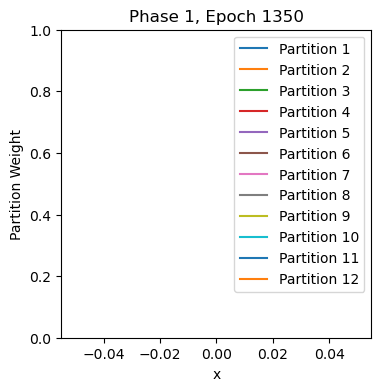

Phase 1, Epoch 1350, Loss: nan, λ: 0.188296
Phase 1, Epoch 1360, Loss: nan, λ: 0.188296
Phase 1, Epoch 1370, Loss: nan, λ: 0.188296
Phase 1, Epoch 1380, Loss: nan, λ: 0.188296
Phase 1, Epoch 1390, Loss: nan, λ: 0.188296
Phase 1, Epoch 1400, Loss: nan, λ: 0.188296
Phase 1, Epoch 1410, Loss: nan, λ: 0.188296
Phase 1, Epoch 1420, Loss: nan, λ: 0.188296
Phase 1, Epoch 1430, Loss: nan, λ: 0.188296
Phase 1, Epoch 1440, Loss: nan, λ: 0.186413
Phase 1, Epoch 1450, Loss: nan, λ: 0.186413
Phase 1, Epoch 1460, Loss: nan, λ: 0.186413


KeyboardInterrupt: 

In [49]:
import jax
import jax.numpy as jnp

key = jax.random.PRNGKey(42)
num_partition = 12
model = RBFPOUNet(input_dim=1, num_centers=num_partition, key=key)

# generate non-uniform training points
uniform_x = jnp.linspace(0, 6, 60)         # first generate uniform points in [0,1]
non_uniform_x = uniform_x**0.5              # bias towards the right (square root)

# scale to [0,6]
x_train_raw = non_uniform_x * 6

y_train = toy_func(x_train_raw)

normalizer = Normalizer(min_val=x_train_raw.min(), max_val=x_train_raw.max())
x_train = normalizer.transform(x_train_raw)  # normalized to [0,1]

final_params = train_two_phase_lsgd_rbf(
    model,
    x_train,
    y_train,
    num_epochs_phase1=1500,
    num_epochs_phase2=500,
    lambda_reg=0.2,
    rho=0.99,
    n_stag=100,
    lr_phase1=0.0005,
    lr_phase2=0.0001
)
